# Part 1: K-means 
First, watch the three provided video's by Andrew Ng.

## Implementing the algorithm
The goal of *K-means* is to find $k$ clusters, or groups, within a dataset. 
The pseudo-code for the algorithm to find $k$ clusters, is shown here:

* Initialize $m_i$, $i$ = $1$, ... , $k$, for example, to $k$ random $x^t$
* Until $m_i$ converges:
    * For all $x^t \in X$
        * $b_i^t \leftarrow \left\{\begin{array}{ll} 1 & if\ \Vert x^t − m_i \Vert \ =\ min_j\ \Vert x^t − m_j \Vert\\ 
            0 & otherwise \\ \end{array}\right.$
    * For all $m_i$, $i$ = $1$, ... , $k$
        * $m_i \leftarrow \sum_t b_i^t x^t / \sum_t b_i^t$
        
Or in text:

* Initialize the means
* While not converged:
    * Get the new cluster assignment
    * Get the new cluster mean

For your code, we will start making **functions** for each of the following components of the k-means algorithm:

* `init_clusters`: Randomly initialize means from the data [1 pt]
* `distance`: Compute the distance between 2 points [1 pt]
* `cluster_assignment`: Compute the matrix $b$ containing the assignments of points to clusters, based on the current means [4 pts]
* `compute_means`: Compute the matrix $m$ containing the computed mean vectors, based on the current assignment of clusters [3 pts]
* `plot_clusters`: Plot the means (as x's) and their assigned points (as dots), with a different color for each cluster (here you may assume the points will all be 2-dimensional, to allow them to be plotted) [4 pts]
* `is_converged`: Determine if the algorithm has converged based on the sets of current and new means. [2 pts]
* `kmeans`: Combine all these functions in a general k-means function [3 pts]

To test the code, you will be making use of the iris dataset, which is imported in the cell below. 

In [2]:
%matplotlib inline

import math
import matplotlib.pylab as plt
import numpy as np

from sklearn import datasets

iris = datasets.load_iris()
data = iris.data[:, 2:]

### `init_clusters` [1 pt]

This function should randomly initialize `k` means from the `data`. You can find your own solution, or use Andrew Ng's solution from the video on "Random Initialisation".

In [3]:
def init_clusters(data, k):
    ### YOUR SOLUTION HERE
    return np.random.permutation(data)[:k, :]

In [4]:
assert init_clusters(data, 1).shape == (1,2)
assert init_clusters(data, 4).shape == (4,2)
assert init_clusters([[1,2,3], [3, 2, 1]], 2).shape == (2, 3)

### `distance` [1 pt]

This function should compute the euclidean distance between 2 $N$-dimensional points `p` and `q`. The euclidean distance $d$ between point $p$ and point $q$ with $N$ dimensions is defined as:

$$ d(p,q) = \sqrt{\sum^N_{i=1}(p_i - q_i)^2} $$

In [5]:
def distance(p, q):
    ### YOUR SOLUTION HERE
    return math.sqrt(np.sum(np.square(p - q)))

In [6]:
assert distance(np.array([3, 3]), np.array([1, 3])) == 2
assert distance(np.array([4, 2]), np.array([5, 1])) == math.sqrt(2)
assert distance(np.array([1, 2, 3]), np.array([3, 2, 1])) == math.sqrt(8)

### `cluster_assignment` [4 pts]
Compute the matrix $b$ containing the assignments of `data` to clusters, based on the current cluster `means`. This means that for every `point` in `data`, you should find the nearest cluster `mean`. The output is expected to be in _"one-hot"_ format, which means that for 4 datapoints, and 3 cluster means, the output should look like:

\[\[1, 0, 0\],
  \[0, 1, 0\],
  \[0, 1, 0\],
  \[0, 0, 1\]\]
 
This means that point 0 was assigned to cluster 0, point 1 was assigned to cluster 1, point 2 was assigned to cluster 1, and point 3 was assigned to cluster 2. 

Essentially, we want to have a row for every 'point' in 'data', where every row contains only one "1" on the colum that indicates its nearest cluster mean.

In [7]:
def cluster_assignment(data, means):
    ### YOUR SOLUTION HERE
    b = np.zeros((data.shape[0], means.shape[0]), dtype=float)
    for t, elem in enumerate(data):
        b[t][np.argmin([distance(elem, m) for m in means])] = 1
    return b

In [8]:
means = np.array([[0, 0], [999999, 999999]])

assert cluster_assignment(data, means).shape == (len(data), len(means)), "The output has the incorrect shape. It should have shape (len(data), len(means))."
assert np.sum(cluster_assignment(data, means), axis=0)[0] == 150, "Not everything was assigned to cluster 0."
assert np.allclose(np.ones((len(data), 1)), np.sum(cluster_assignment(data, means), axis=1)), "There are rows with more than or less than one \"1\""

means = np.array([[4.2, 1.3], [5.6, 2.2], [1.7, 0.2], [5.,  1.5], [4.6, 1.4]])

assert cluster_assignment(data, means).shape == (len(data), len(means)), "The output has the incorrect shape. It should have shape (len(data), len(means))."
assert np.sum(cluster_assignment(data, means)) == 150, "Not everything was assigned to a cluster."
assert np.allclose(np.ones((len(data), 1)), np.sum(cluster_assignment(data, means), axis=1)), "There are rows with more than or less than one \"1\""
assert np.allclose(cluster_assignment(data, means), np.array([[0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,0.,0.,1.], [0.,0.,0.,0.,1.], [0.,0.,0.,1.,0.], [1.,0.,0.,0.,0.], [0.,0.,0.,0.,1.], [0.,0.,0.,0.,1.], [0.,0.,0.,0.,1.], [1.,0.,0.,0.,0.], [0.,0.,0.,0.,1.], [1.,0.,0.,0.,0.], [1.,0.,0.,0.,0.], [1.,0.,0.,0.,0.], [1.,0.,0.,0.,0.], [0.,0.,0.,0.,1.], [1.,0.,0.,0.,0.], [0.,0.,0.,0.,1.], [0.,0.,0.,0.,1.], [1.,0.,0.,0.,0.], [0.,0.,0.,0.,1.], [1.,0.,0.,0.,0.], [0.,0.,0.,1.,0.], [1.,0.,0.,0.,0.], [0.,0.,0.,1.,0.], [0.,0.,0.,0.,1.], [1.,0.,0.,0.,0.], [0.,0.,0.,0.,1.], [0.,0.,0.,0.,1.], [0.,0.,0.,1.,0.], [0.,0.,0.,0.,1.], [1.,0.,0.,0.,0.], [1.,0.,0.,0.,0.], [1.,0.,0.,0.,0.], [1.,0.,0.,0.,0.], [0.,0.,0.,1.,0.], [0.,0.,0.,0.,1.], [0.,0.,0.,0.,1.], [0.,0.,0.,0.,1.], [1.,0.,0.,0.,0.], [1.,0.,0.,0.,0.], [1.,0.,0.,0.,0.], [1.,0.,0.,0.,0.], [0.,0.,0.,0.,1.], [1.,0.,0.,0.,0.], [1.,0.,0.,0.,0.], [1.,0.,0.,0.,0.], [1.,0.,0.,0.,0.], [1.,0.,0.,0.,0.], [1.,0.,0.,0.,0.], [1.,0.,0.,0.,0.], [1.,0.,0.,0.,0.], [0.,1.,0.,0.,0.], [0.,0.,0.,1.,0.], [0.,1.,0.,0.,0.], [0.,1.,0.,0.,0.], [0.,1.,0.,0.,0.], [0.,1.,0.,0.,0.], [0.,0.,0.,0.,1.], [0.,1.,0.,0.,0.], [0.,1.,0.,0.,0.], [0.,1.,0.,0.,0.], [0.,0.,0.,1.,0.], [0.,1.,0.,0.,0.], [0.,1.,0.,0.,0.], [0.,0.,0.,1.,0.], [0.,1.,0.,0.,0.], [0.,1.,0.,0.,0.], [0.,1.,0.,0.,0.], [0.,1.,0.,0.,0.], [0.,1.,0.,0.,0.], [0.,0.,0.,1.,0.], [0.,1.,0.,0.,0.], [0.,0.,0.,1.,0.], [0.,1.,0.,0.,0.], [0.,0.,0.,1.,0.], [0.,1.,0.,0.,0.], [0.,1.,0.,0.,0.], [0.,0.,0.,1.,0.], [0.,0.,0.,1.,0.], [0.,1.,0.,0.,0.], [0.,1.,0.,0.,0.], [0.,1.,0.,0.,0.], [0.,1.,0.,0.,0.], [0.,1.,0.,0.,0.], [0.,0.,0.,1.,0.], [0.,0.,0.,1.,0.], [0.,1.,0.,0.,0.], [0.,1.,0.,0.,0.], [0.,1.,0.,0.,0.], [0.,0.,0.,1.,0.], [0.,1.,0.,0.,0.], [0.,1.,0.,0.,0.], [0.,1.,0.,0.,0.], [0.,0.,0.,1.,0.], [0.,1.,0.,0.,0.], [0.,1.,0.,0.,0.], [0.,1.,0.,0.,0.], [0.,0.,0.,1.,0.], [0.,1.,0.,0.,0.], [0.,1.,0.,0.,0.], [0.,0.,0.,1.,0.]])), "Points were not properly assigned to the closest cluster mean."

### `compute_means` [3 pts]
Compute the matrix $m$ containing the new computed mean vectors, based on the current assignment of clusters `b`. Use `b` to get all the `points` in `data` that are assigned to one cluster, and average the values to get the new cluster mean.

Note that it is possible that there is a cluster with no assigned points. When this is the case, it is impossible to calculate a new mean, so instead, use the value of a random point from `data` as this clusters' mean. This way, the next iteration in the k-means algorithm will assign at least one point to this cluster.

In [82]:
def compute_means(data, b):
    ### YOUR SOLUTION HERE
    means = []
    for i in range(b.shape[1]):
        s = np.sum(b[:, i])
        if s == 0:
            means.append(init_clusters(data, 1)[0])
        else:
            means.append(np.sum(data[b[:, i] == 1, :], axis=0) / s)
    return np.array(means)

In [83]:
assert compute_means(np.array([[1, 3, 0], [0, 2, 3], [1, 0, 1]]), np.array([[1, 0],[1, 0], [0, 1]])).shape == (2, 3), "The output shape of your function is incorrect."
assert np.allclose(compute_means(np.array([[1, 3, 0], [0, 2, 3], [1, 0, 1]]), np.array([[1, 0],[1, 0], [0, 1]])), np.array([[0.5, 2.5, 1.5], [1, 0, 1]])), "The computed means are incorrect."

b = np.array([[0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,0.,0.,1.], [0.,0.,0.,0.,1.], [0.,0.,0.,1.,0.], [1.,0.,0.,0.,0.], [0.,0.,0.,0.,1.], [0.,0.,0.,0.,1.], [0.,0.,0.,0.,1.], [1.,0.,0.,0.,0.], [0.,0.,0.,0.,1.], [1.,0.,0.,0.,0.], [1.,0.,0.,0.,0.], [1.,0.,0.,0.,0.], [1.,0.,0.,0.,0.], [0.,0.,0.,0.,1.], [1.,0.,0.,0.,0.], [0.,0.,0.,0.,1.], [0.,0.,0.,0.,1.], [1.,0.,0.,0.,0.], [0.,0.,0.,0.,1.], [1.,0.,0.,0.,0.], [0.,0.,0.,1.,0.], [1.,0.,0.,0.,0.], [0.,0.,0.,1.,0.], [0.,0.,0.,0.,1.], [1.,0.,0.,0.,0.], [0.,0.,0.,0.,1.], [0.,0.,0.,0.,1.], [0.,0.,0.,1.,0.], [0.,0.,0.,0.,1.], [1.,0.,0.,0.,0.], [1.,0.,0.,0.,0.], [1.,0.,0.,0.,0.], [1.,0.,0.,0.,0.], [0.,0.,0.,1.,0.], [0.,0.,0.,0.,1.], [0.,0.,0.,0.,1.], [0.,0.,0.,0.,1.], [1.,0.,0.,0.,0.], [1.,0.,0.,0.,0.], [1.,0.,0.,0.,0.], [1.,0.,0.,0.,0.], [0.,0.,0.,0.,1.], [1.,0.,0.,0.,0.], [1.,0.,0.,0.,0.], [1.,0.,0.,0.,0.], [1.,0.,0.,0.,0.], [1.,0.,0.,0.,0.], [1.,0.,0.,0.,0.], [1.,0.,0.,0.,0.], [1.,0.,0.,0.,0.], [0.,1.,0.,0.,0.], [0.,0.,0.,1.,0.], [0.,1.,0.,0.,0.], [0.,1.,0.,0.,0.], [0.,1.,0.,0.,0.], [0.,1.,0.,0.,0.], [0.,0.,0.,0.,1.], [0.,1.,0.,0.,0.], [0.,1.,0.,0.,0.], [0.,1.,0.,0.,0.], [0.,0.,0.,1.,0.], [0.,1.,0.,0.,0.], [0.,1.,0.,0.,0.], [0.,0.,0.,1.,0.], [0.,1.,0.,0.,0.], [0.,1.,0.,0.,0.], [0.,1.,0.,0.,0.], [0.,1.,0.,0.,0.], [0.,1.,0.,0.,0.], [0.,0.,0.,1.,0.], [0.,1.,0.,0.,0.], [0.,0.,0.,1.,0.], [0.,1.,0.,0.,0.], [0.,0.,0.,1.,0.], [0.,1.,0.,0.,0.], [0.,1.,0.,0.,0.], [0.,0.,0.,1.,0.], [0.,0.,0.,1.,0.], [0.,1.,0.,0.,0.], [0.,1.,0.,0.,0.], [0.,1.,0.,0.,0.], [0.,1.,0.,0.,0.], [0.,1.,0.,0.,0.], [0.,0.,0.,1.,0.], [0.,0.,0.,1.,0.], [0.,1.,0.,0.,0.], [0.,1.,0.,0.,0.], [0.,1.,0.,0.,0.], [0.,0.,0.,1.,0.], [0.,1.,0.,0.,0.], [0.,1.,0.,0.,0.], [0.,1.,0.,0.,0.], [0.,0.,0.,1.,0.], [0.,1.,0.,0.,0.], [0.,1.,0.,0.,0.], [0.,1.,0.,0.,0.], [0.,0.,0.,1.,0.], [0.,1.,0.,0.,0.], [0.,1.,0.,0.,0.], [0.,0.,0.,1.,0.]])

assert np.allclose(compute_means(data, b), np.array([[3.92222222, 1.1962963], [5.79142857, 2.12857143], [1.462, 0.246], [5.00526316, 1.74736842], [4.57368421, 1.45263158]])), "The computed means are incorrect."

assert compute_means(np.array([[1, 3, 0], [0, 2, 3], [1, 0, 1]]), np.array([[1, 0],[1, 0], [1, 0]]))[1] in  np.array([[1, 3, 0], [0, 2, 3], [1, 0, 1]]), "The compute_means function does not properly handle clusters that have no assigned points."

### `plot_clusters` [4 pts]
Plot the `means` (as x's) and their assigned points (as dots), with a different color for each cluster (here you may assume the points will all be 2-dimensional, to allow them to be plotted).

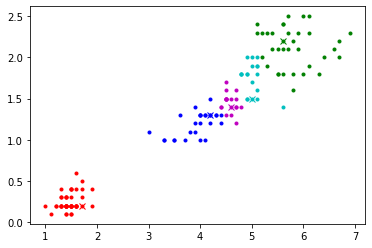

In [26]:
def plot_clusters(data, b, means):
    ### YOUR SOLUTION HERE
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
    for i in range(b.shape[1]):
        a = b[:, i] == 1
        plt.plot(data[a, 0], data[a, 1], '.'+colors[i])
    for i in range(means.shape[0]):
        plt.plot(means[i, 0], means[i, 1], 'x'+colors[i])
    plt.show()
    ### END SOLUTION

plot_clusters(data, b, means)

### `is_converged` [2 pts]
Determine if the algorithm has converged based on the sets of `old` and `new` cluster means. 

In [47]:
def is_converged(old, new):
    ### YOUR SOLUTION HERE
    return np.allclose(old, new)

In [48]:
assert is_converged(np.array([[1, 0]]), np.array([[1, 0]])), "Incorrect output for two equal mean matrices."
assert is_converged(np.array([[1, 0, 0], [0, 1, 0]]), np.array([[1, 0, 0], [0, 1, 0]])), "Incorrect output for two equal mean matrices."
assert is_converged(means, means), "Incorrect output for two equal mean matrices."
assert not is_converged(np.array([[1, 0]]), np.array([[0, 1]])), "Incorrect output for two unequal mean matrices."

### `kmeans`  [3 pts]
Combine all these functions in a general k-means function. Recall the pseudocode we have shown at the start:

* Initialize $m_i$, $i$ = $1$, ... , $k$, for example, to $k$ random $x^t$
* Until $m_i$ converges
    * For all $x^t \in X$
        * $b_i^t \leftarrow \left\{\begin{array}{ll} 1 & if\ \Vert x^t − m_i \Vert \ =\ min_j\ \Vert x^t − m_j \Vert\\ 
            0 & otherwise \\ \end{array}\right.$
    * For all $m_i$, $i$ = $1$, ... , $k$
        * $m_i \leftarrow \sum_t b_i^t x^t / \sum_t b_i^t$

Or in text:

* Initialize the means
* While not converged
    * Get the new cluster assignment
    * Get the new cluster mean
    
At the end of the function, return the resulting cluster `means`.

In [80]:
def kmeans(data, k):
    ### YOUR SOLUTION HERE
    means = init_clusters(data, k)
    old_means = means + 1
    
    while not is_converged(old_means, means):
        old_means = means
        b = cluster_assignment(data, means)
        means = compute_means(data, b)    
        
    return means

In [85]:
assert kmeans(data, 3).shape == (3, data.shape[1]), "Your output has the incorrect shape."
assert kmeans(data, 12).shape == (12, data.shape[1]), "Your output has the incorrect shape."
assert np.all([mean in np.array([[1, 3, 0], [0, 2, 3], [1, 0, 1]]) for mean in kmeans(np.array([[1, 3, 0], [0, 2, 3], [1, 0, 1]]), 3)]), "Your function assigns incorrect means"

## Showing the results [4pt]

To show that your code works, run parts of the algorithm on the Iris dataset using `data`; use $k=3$ and plot the means with their assignments using `plot_clusters`. 

Start with the random means and then show at least 2 steps (just copy the code from your `kmeans` function), to show the means moving as the algorithm iterates. 

Finally, show the resulting plot where the means have converged and the algorithm has stopped.

Iteration:  0


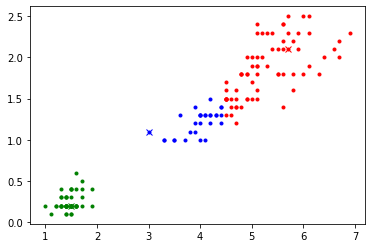

Iteration:  1


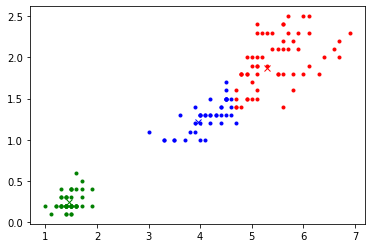

Iteration:  2


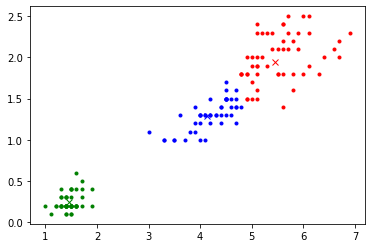

Converged Result


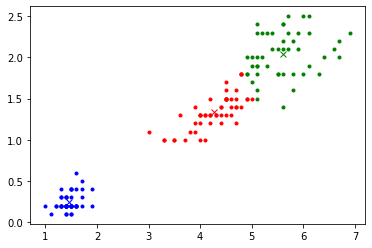

In [87]:
### YOUR SOLUTION HERE
means = init_clusters(data, 3)
for i in range(3):
    print("Iteration: ", i)
    b = cluster_assignment(data, means)
    plot_clusters(data, b, means)
    means = compute_means(data, b)
    
print("Converged Result")
means = kmeans(data, 3)
b = cluster_assignment(data, means)
plot_clusters(data, b, means)

# Part 2: elbow method

For this dataset we have the benefit that it is possible to see the correct number of clusters (either 2 or 3 clusters). However, even if the number clusters is not known or set before hand, there are ways to solve the clustering problem. One such possbile approach is the *elbow method*. If you have not watched the video on "Choosing the number of clusters" from Andrew Ng, please do so before continuing.

Now extend your implementation to include the following:

* `cost`: Create a sensible cost function that is minimized when steps of the algorithm are done. Use the data and the current values of $b$ and $m$. [2 pts]
* `average_cost`: Create a function to compute the converged cost of a specific value of $k$ repeatedly and averaging this. [2 pts]
* Compute the average cost for k values $1$ to $10$ and combine them in a plot. Briefly discuss if this plot corresponds with your expectations. [2 pts]

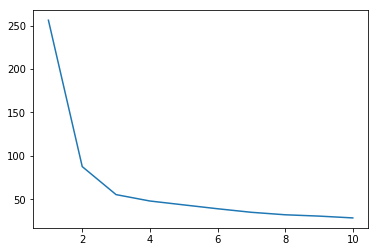

In [3]:
def cost(data, means, b):
    ### YOUR SOLUTION HERE
    c = 0
    for i in range(means.shape[0]):
        c += sum([distance(means[i, :], elem) for elem in data[b[:, i] == 1, :]])
    return c

def average_cost(data, k, n):
    ### YOUR SOLUTION HERE
    c = 0
    for i in range(n):
        m = kmeans(data, k)
        b = cluster_assignment(data, m)
        c += cost(data, m, b)
    return c / n

### YOUR SOLUTION HERE
k_vals = range(1, 11)
c_vals = []
for k in k_vals:
    c_vals.append(average_cost(data, k, 10))

plt.plot(k_vals, c_vals)
plt.show()